# Dependencies

In [2]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Features Definition

    Overhang (Continuous):
        Definition: Represents the extent to which parts of the shape extend beyond a base or another part, possibly indicating overhanging design elements.
        Utility: Useful for assessing potential structural challenges or aesthetic characteristics.
    Inclusion Rate (Continuous):
        Definition: Percentage indicating the proportion of the shape within specified criteria or boundaries.
        Utility: Measures compliance with design specifications, can be used for quality control.
    Exclusion Rate (Continuous):
        Definition: Percentage indicating the proportion of the shape outside specified criteria or boundaries.
        Utility: Helps in understanding deviations from design norms or expected features.
    Porosity (Continuous):
        Definition: Ratio of surface area to volume, giving insight into the texture or material properties of the shape.
        Utility: Important in materials science, affecting properties like strength, permeability, and appearance.
    Volume (Continuous):
        Definition: The total three-dimensional space occupied by the shape.
        Utility: Essential for size-related calculations, space usage, and material estimation.
    Surface Area (Continuous):
        Definition: Total area that the surface of the shape occupies.
        Utility: Important in processes like coating or painting, heat exchange calculations, and cost estimations based on surface treatments.
    Compactness (Continuous):
        Definition: Measures how space-efficient the shape is, related to how closely it approximates a sphere (the most compact three-dimensional shape).
        Utility: Reflects design efficiency, with implications for material usage and structural integrity.
    Eccentricity (Continuous):
        Definition: Measures the deviation of the shape from perfect symmetry, quantifying shape elongation or irregularity.
        Utility: Critical in assessing balance, aesthetics, and physical performance, especially where directional properties are important.
    Total Blocks (Discrete):
        Definition: The count of discrete elements or components making up the shape.
        Utility: Useful for inventory management, manufacturing process analysis, and cost estimation based on unit operations.
    Total Cost (Continuous):
        Definition: The overall cost associated with the shape, aggregating materials, production, and possibly design costs.
        Utility: Crucial for financial analysis, budgeting, and economic assessment of production efficiency.
    Layer Diff Sum (Continuous):
        Definition: A cumulative measure of the differences between layers in terms of block count or configuration.
        Utility: Indicates complexity in layer-based manufacturing processes, such as 3D printing or layered fabrication.
    Layer Diff Max (Continuous):
        Definition: The maximum difference observed between any two consecutive layers, highlighting potential points of stress or weakness.
        Utility: Useful for identifying critical points in the manufacturing or assembly process that may require reinforcement or redesign.

# Loading Data

In [4]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/G11-Data Encoding/Data/Gen03.csv')
pd.set_option('display.max_columns', None)

print(data)

        Overhang  Inclusion  Exclusion  Porosity        Volume  Surface Area  \
0    2873.680733   0.815114   0.184810  0.492870  16116.327244   6764.310774   
1    2783.499495   0.817599   0.182707  0.488617  15539.757198   6627.940153   
2    2761.645296   0.820764   0.179662  0.481437  15812.844876   6561.375307   
3    2763.271052   0.817027   0.182968  0.489913  15346.918959   6600.708729   
4    2750.732034   0.814222   0.185777  0.497378  14800.203256   6617.974774   
..           ...        ...        ...       ...           ...           ...   
895  4296.057951   0.900786   0.099213  0.249609  42767.255647   7991.783800   
896  4446.152352   0.903691   0.096351  0.248521  40274.042413   7839.122829   
897  4442.602559   0.903688   0.096334  0.248425  40234.113427   7833.230785   
898  4349.670148   0.905702   0.094537  0.247763  39170.886679   7631.098455   
899  4241.809128   0.907039   0.094247  0.245872  38103.050937   7441.039307   

     Compactness  Eccentricity  Total B

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overhang        900 non-null    float64
 1   Inclusion       900 non-null    float64
 2   Exclusion       900 non-null    float64
 3   Porosity        900 non-null    float64
 4   Volume          900 non-null    float64
 5   Surface Area    900 non-null    float64
 6   Compactness     900 non-null    float64
 7   Eccentricity    900 non-null    float64
 8   Total Blocks    900 non-null    float64
 9   Total Cost      900 non-null    float64
 10  Layer Diff Sum  900 non-null    float64
 11  Layer Diff Max  900 non-null    float64
dtypes: float64(12)
memory usage: 84.5 KB


In [6]:
# Rename columns by replacing spaces with underscores
data.columns = data.columns.str.replace(' ', '_')

# Verify the changes
print(data.columns)


Index(['Overhang', 'Inclusion', 'Exclusion', 'Porosity', 'Volume',
       'Surface_Area', 'Compactness', 'Eccentricity', 'Total_Blocks',
       'Total_Cost', 'Layer_Diff_Sum', 'Layer_Diff_Max'],
      dtype='object')


array([[<Axes: title={'center': 'Overhang'}>]], dtype=object)

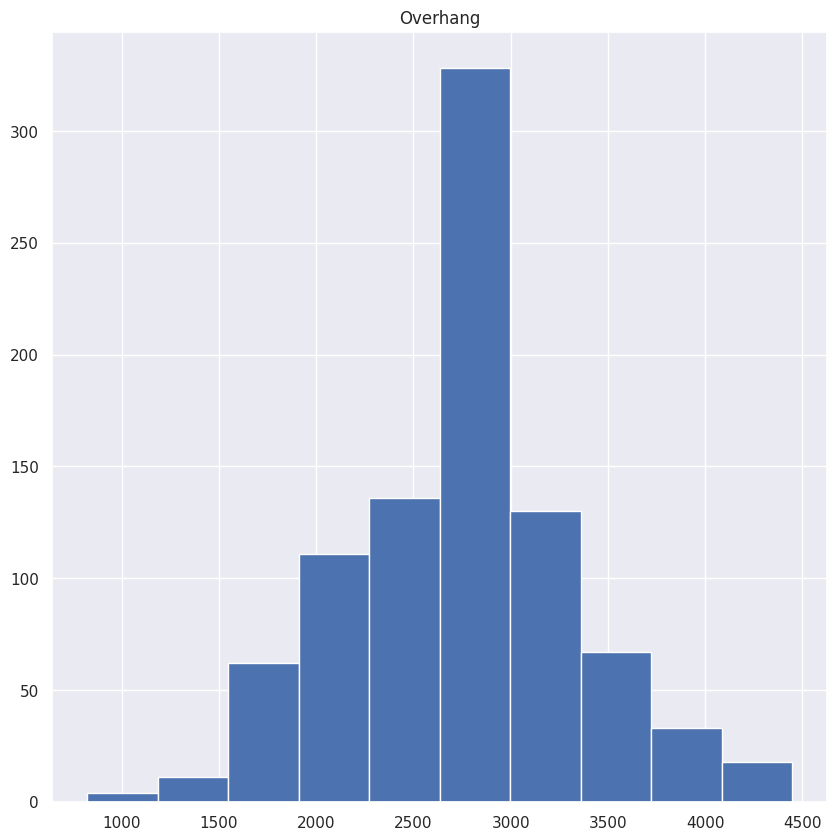

In [7]:
data.hist("Overhang")

array([[<Axes: title={'center': 'Total_Blocks'}>]], dtype=object)

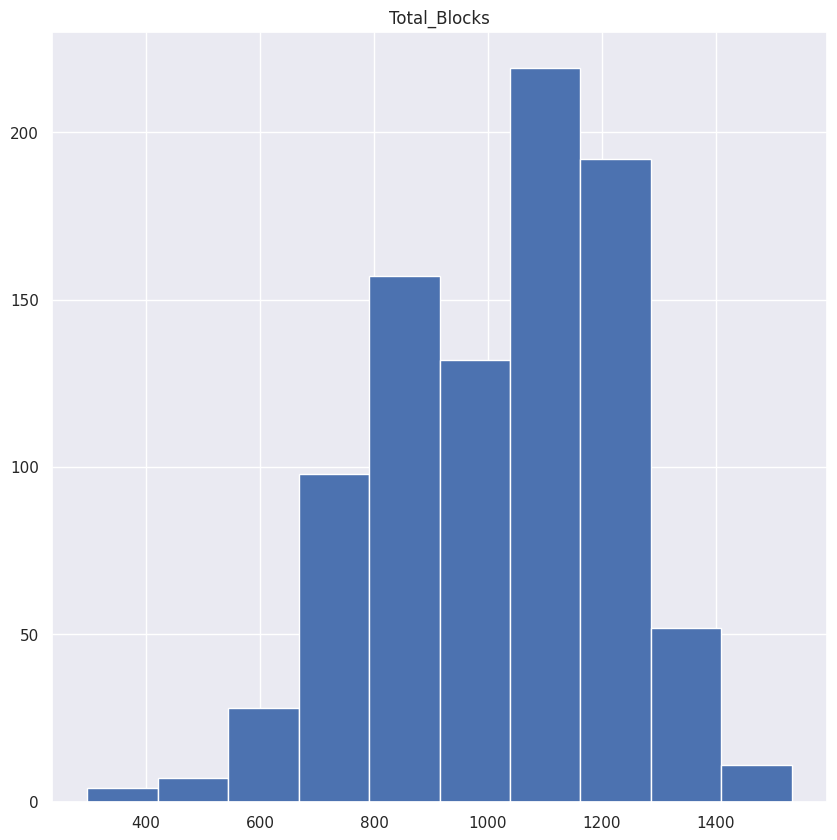

In [9]:
data.hist("Total_Blocks")

array([[<Axes: title={'center': 'Total_Cost'}>]], dtype=object)

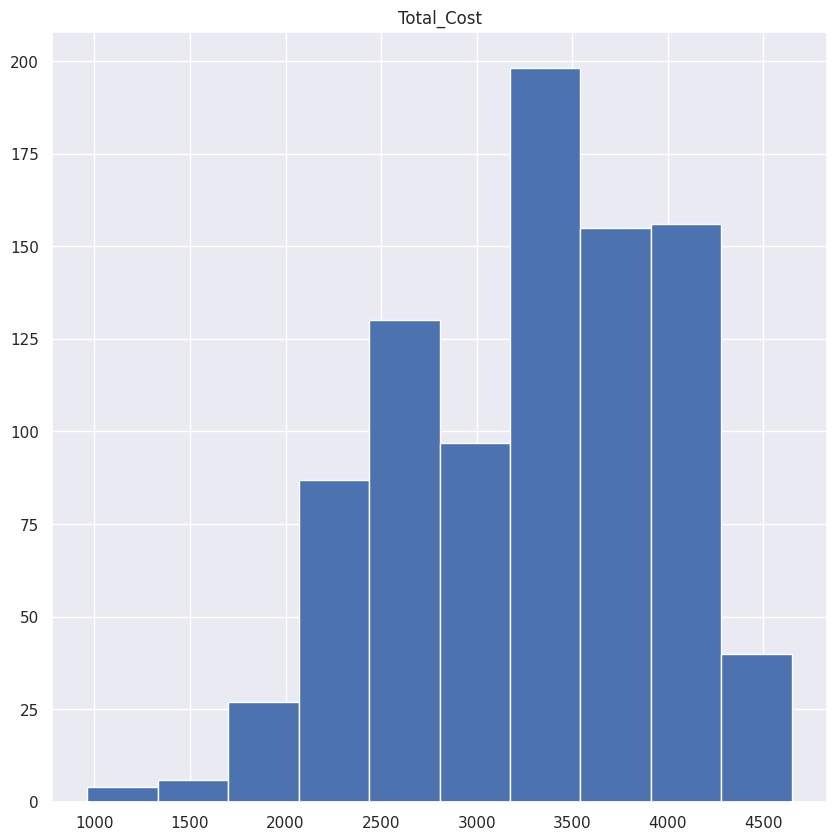

In [10]:
data.hist("Total_Cost")

array([[<Axes: title={'center': 'Volume'}>]], dtype=object)

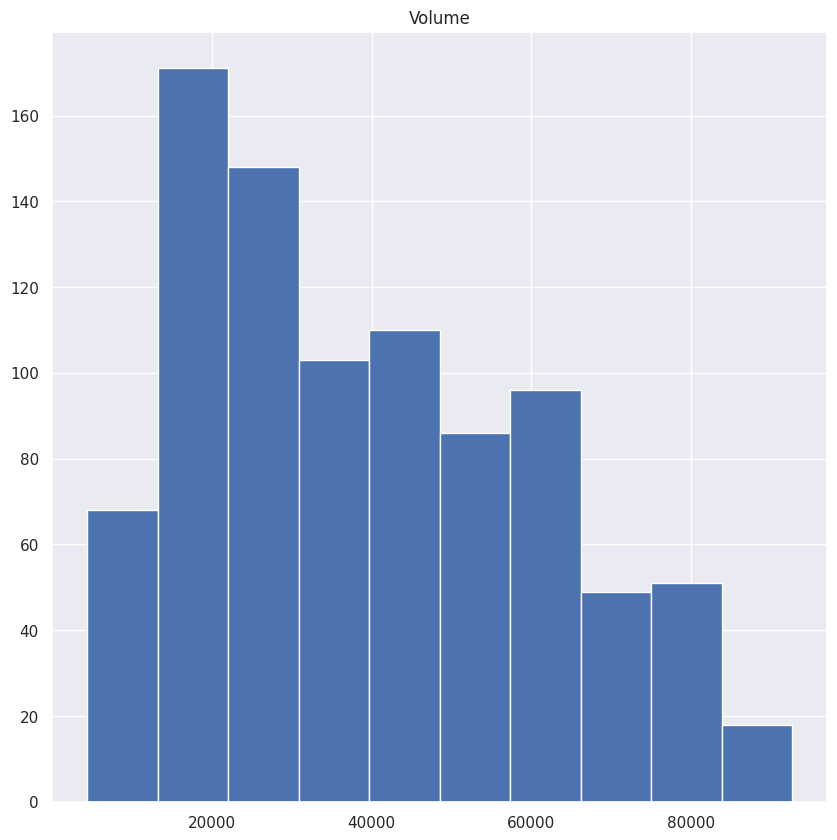

In [11]:
data.hist("Volume")

# Total_Blocks VS All Features

<Axes: xlabel='Total_Blocks', ylabel='Total_Cost'>

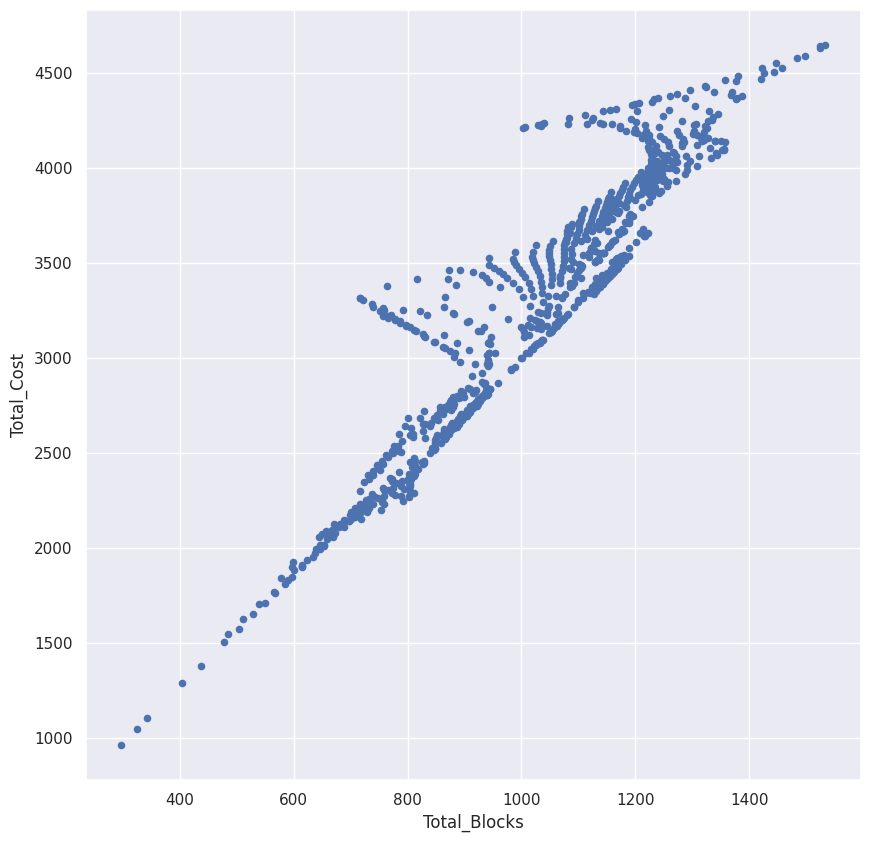

In [12]:
data.plot.scatter("Total_Blocks", "Total_Cost")

<Axes: xlabel='Total_Blocks', ylabel='Overhang'>

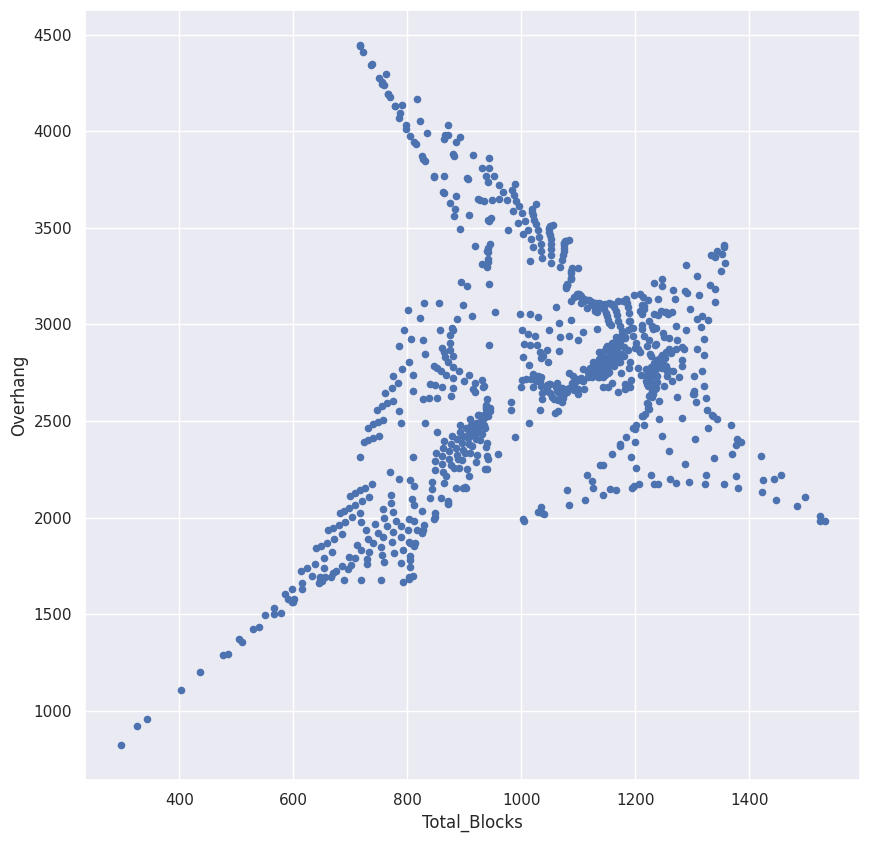

In [13]:
data.plot.scatter("Total_Blocks", "Overhang")

Prepare data

<Axes: xlabel='Total_Blocks', ylabel='Inclusion'>

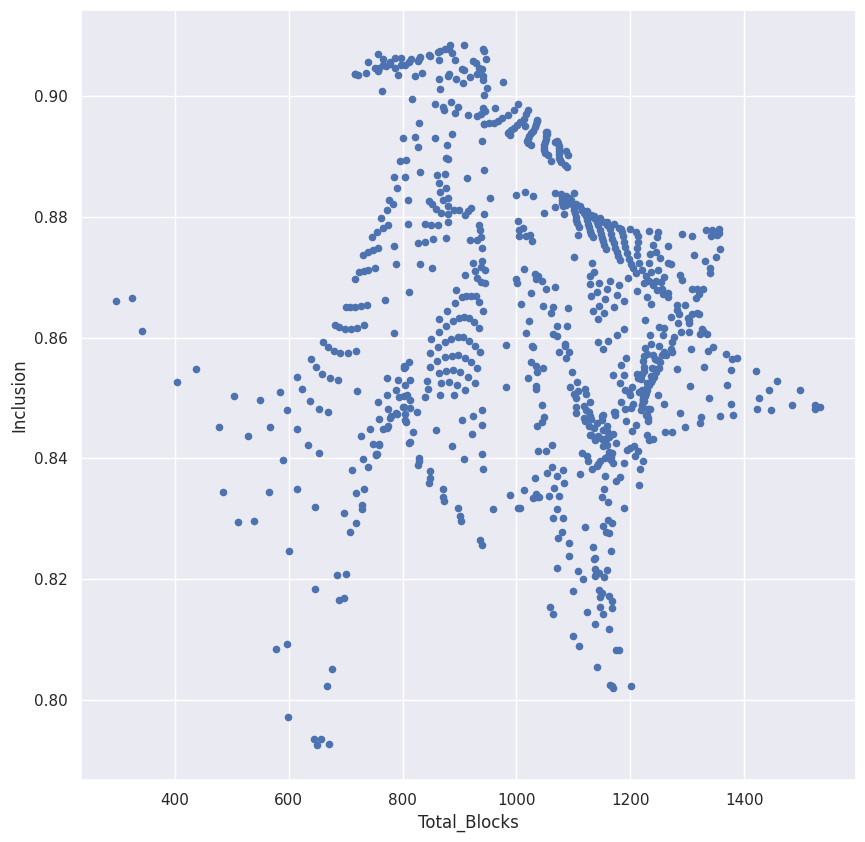

In [14]:
data.plot.scatter("Total_Blocks", "Inclusion")

<Axes: xlabel='Total_Blocks', ylabel='Exclusion'>

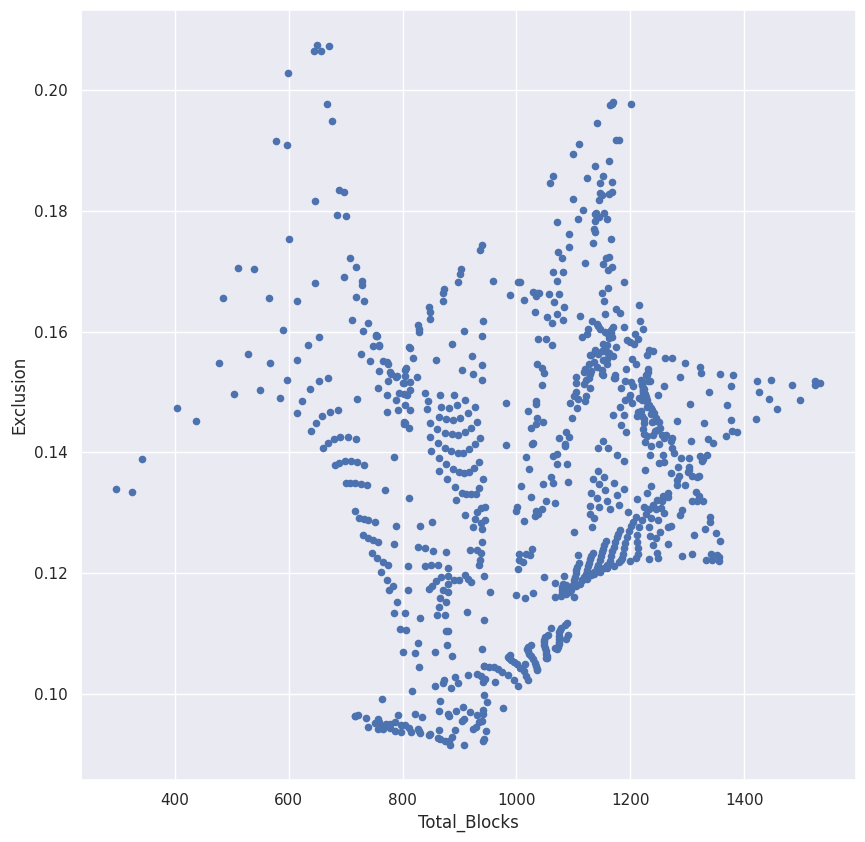

In [15]:
data.plot.scatter("Total_Blocks", "Exclusion")

<Axes: xlabel='Total_Blocks', ylabel='Porosity'>

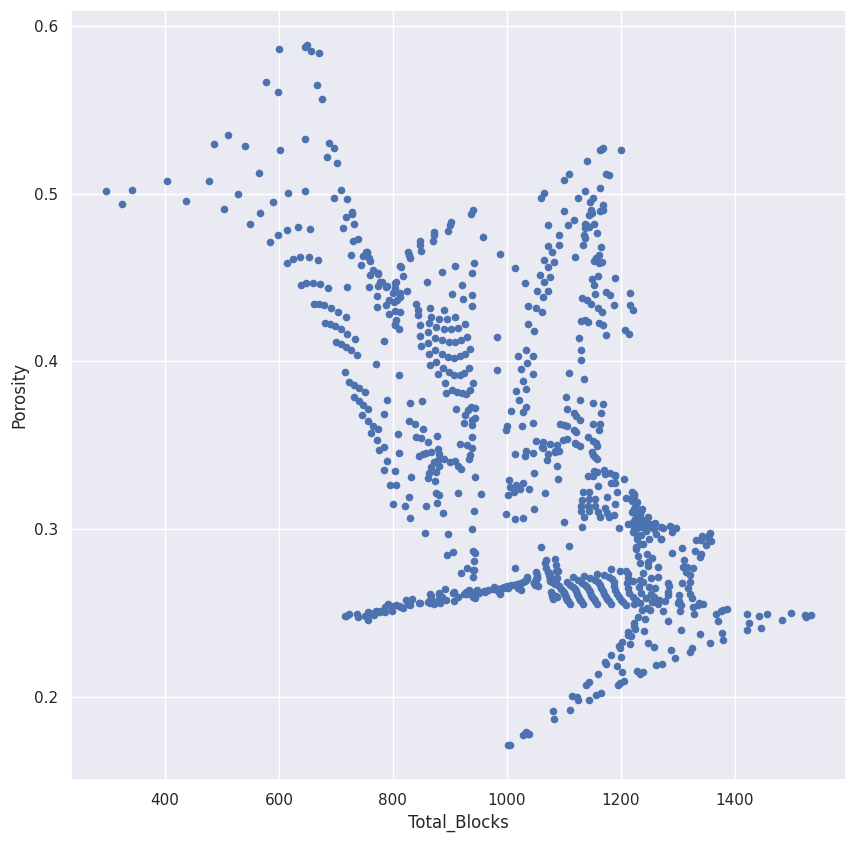

In [16]:
data.plot.scatter("Total_Blocks", "Porosity")

<Axes: xlabel='Total_Blocks', ylabel='Surface_Area'>

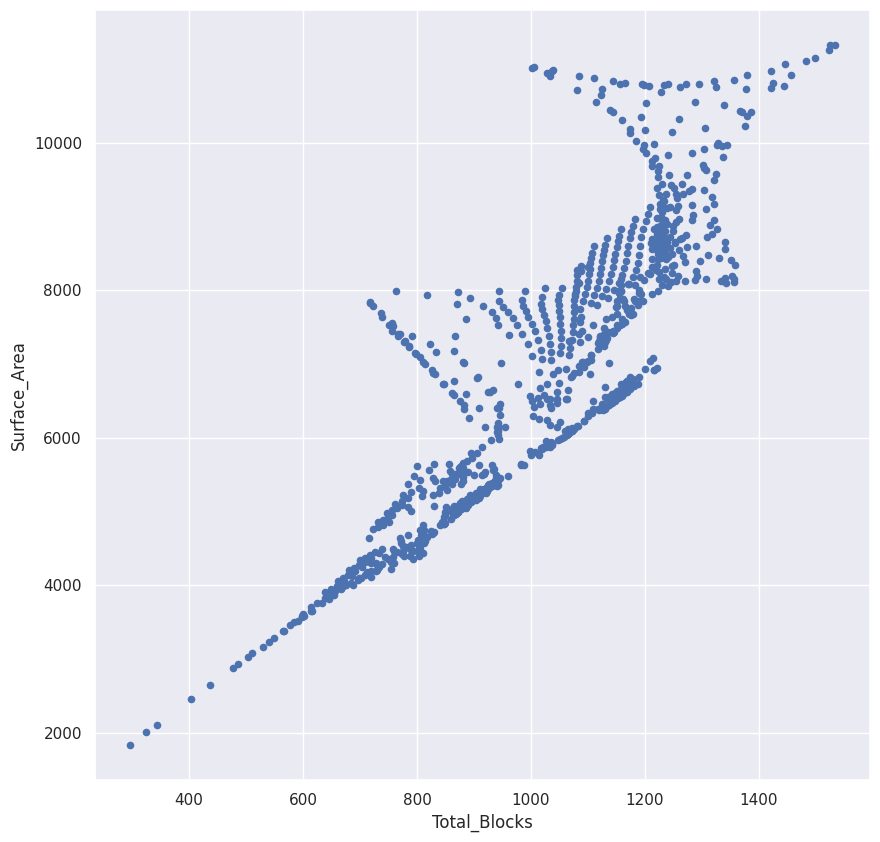

In [18]:
data.plot.scatter("Total_Blocks", "Surface_Area")

<Axes: xlabel='Total_Blocks', ylabel='Volume'>

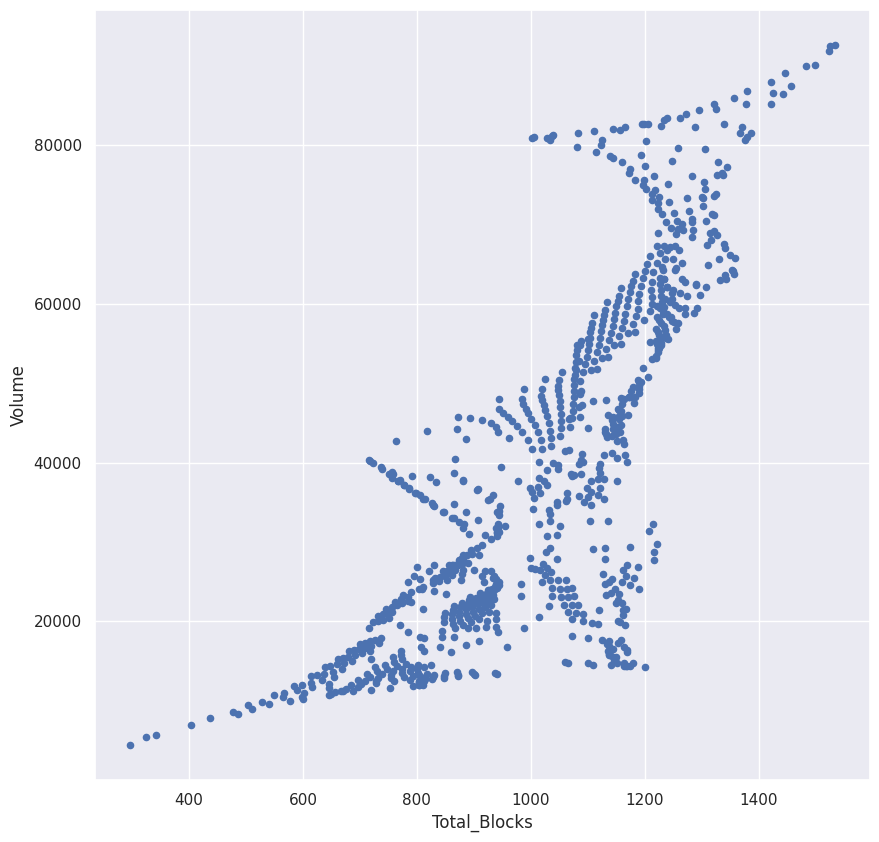

In [19]:
data.plot.scatter("Total_Blocks", "Volume")

<Axes: xlabel='Total_Blocks', ylabel='Compactness'>

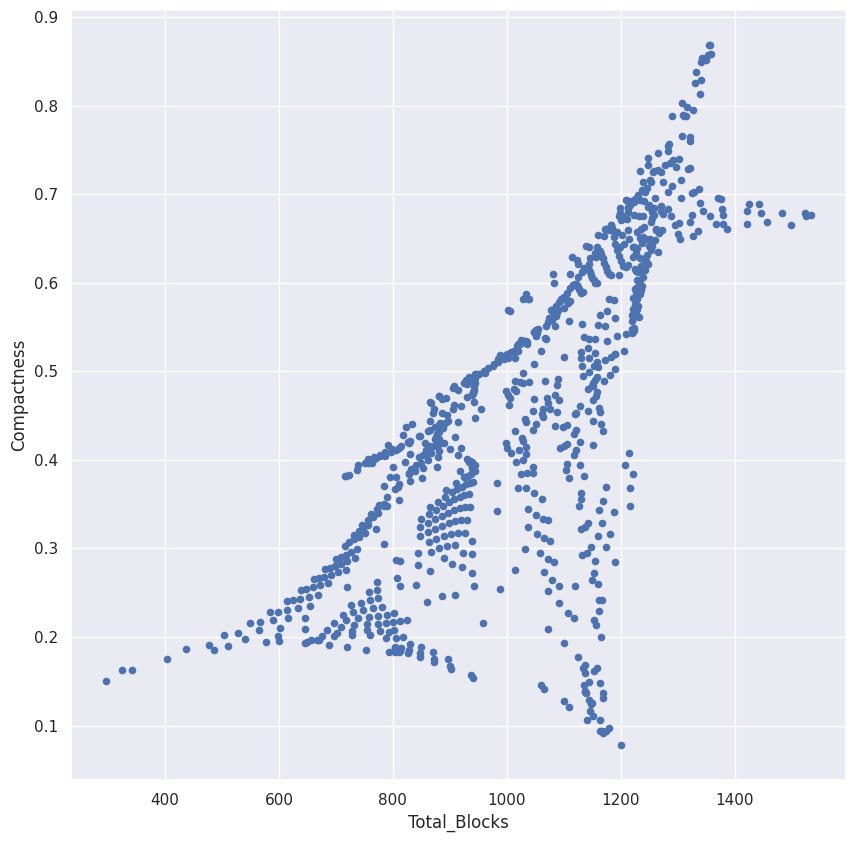

In [20]:
data.plot.scatter("Total_Blocks", "Compactness")

<Axes: xlabel='Total_Blocks', ylabel='Eccentricity'>

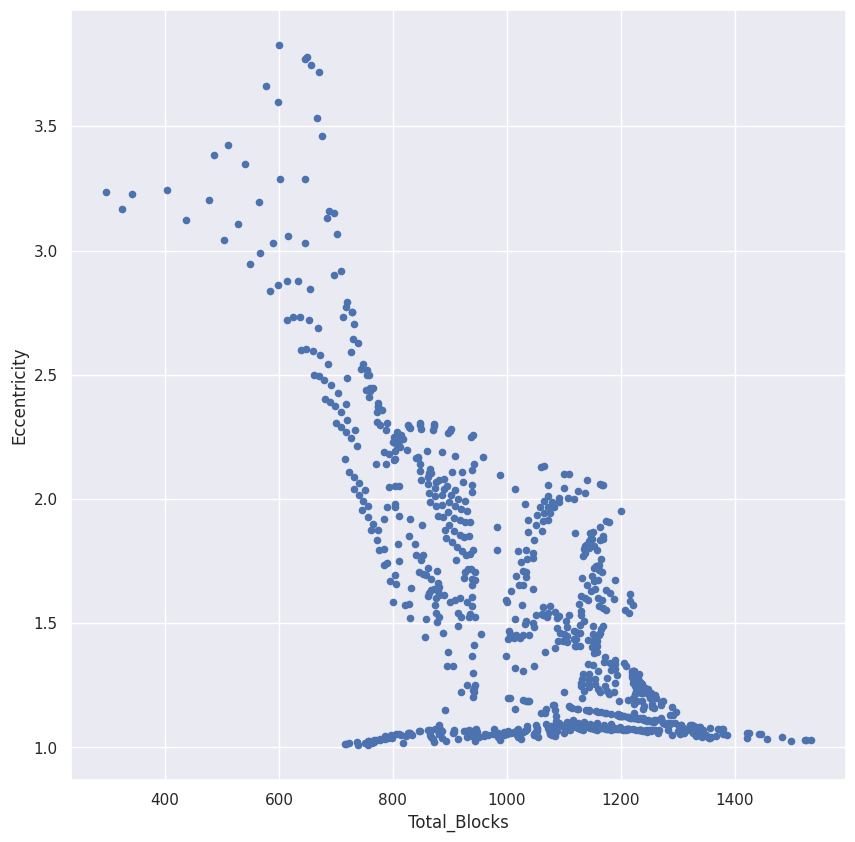

In [21]:
data.plot.scatter("Total_Blocks", "Eccentricity")

<Axes: xlabel='Total_Blocks', ylabel='Layer_Diff_Sum'>

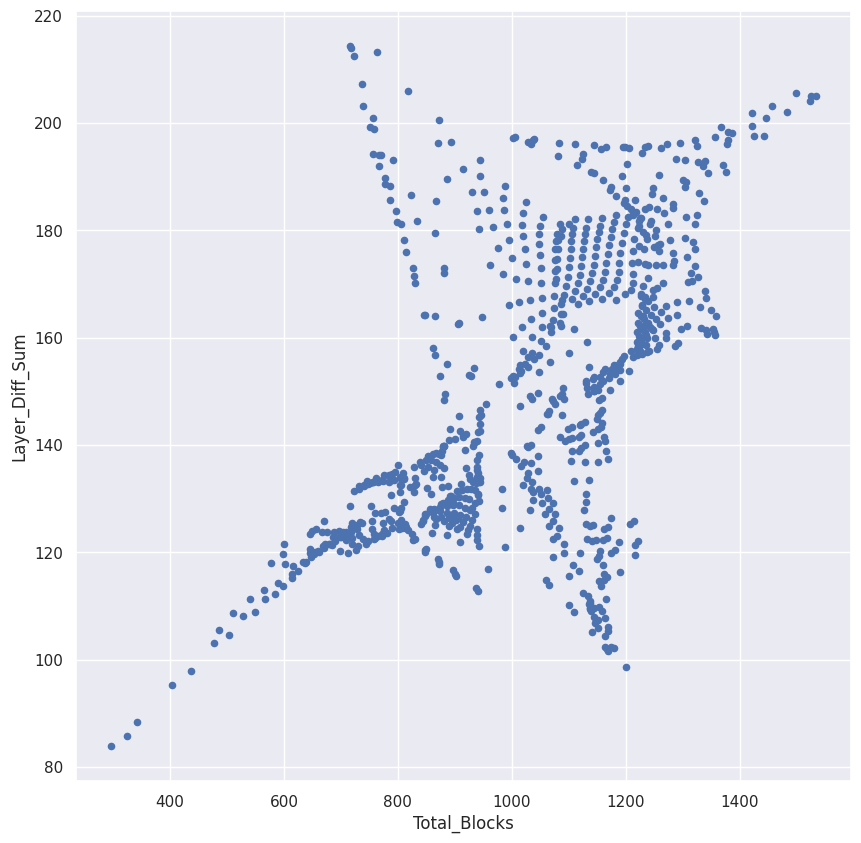

In [22]:
data.plot.scatter("Total_Blocks", "Layer_Diff_Sum")

<Axes: xlabel='Total_Blocks', ylabel='Layer_Diff_Max'>

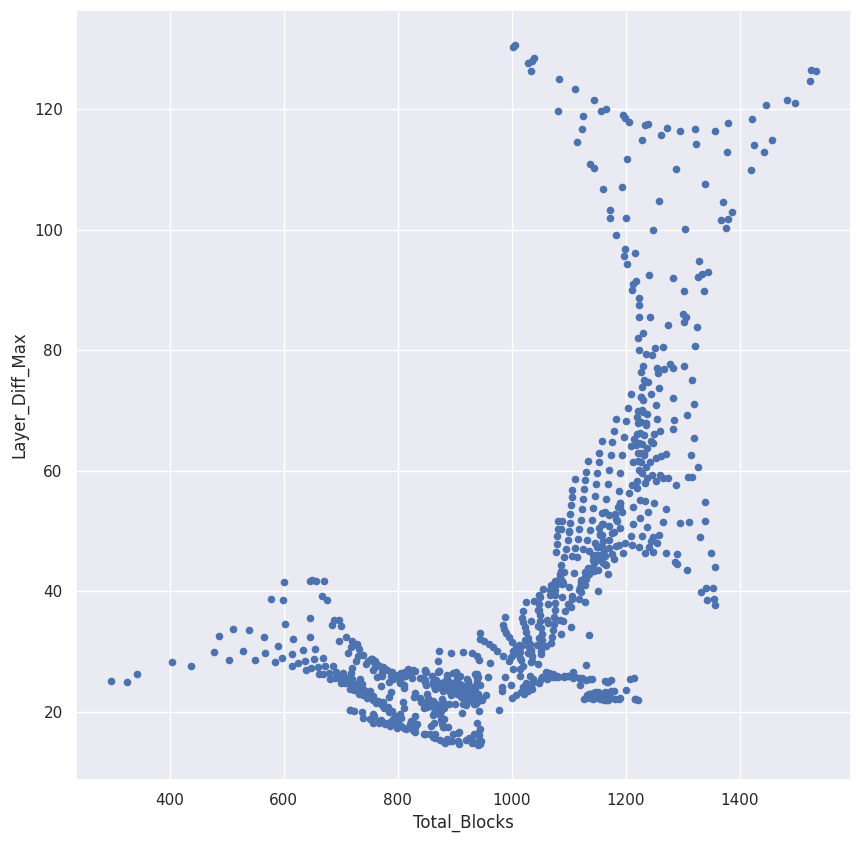

In [23]:
data.plot.scatter("Total_Blocks", "Layer_Diff_Max")

In [24]:
# Select the (independant) features that we are going to use to train the model
X_lengths = data.loc[:, ["Total_Cost", "Total_Blocks"]]
print(X_lengths)

      Total_Cost  Total_Blocks
0    3522.662585   1168.048103
1    3449.301161   1150.358313
2    3414.570783   1139.800513
3    3435.797245   1147.193799
4    3444.599573   1151.608583
..           ...           ...
895  3380.587760    763.202529
896  3317.600162    716.602588
897  3315.674296    717.036978
898  3267.425395    738.702049
899  3220.505167    756.231245

[900 rows x 2 columns]


# Analyzing Feature Importance

**1.Correlation matrix to understand the features**

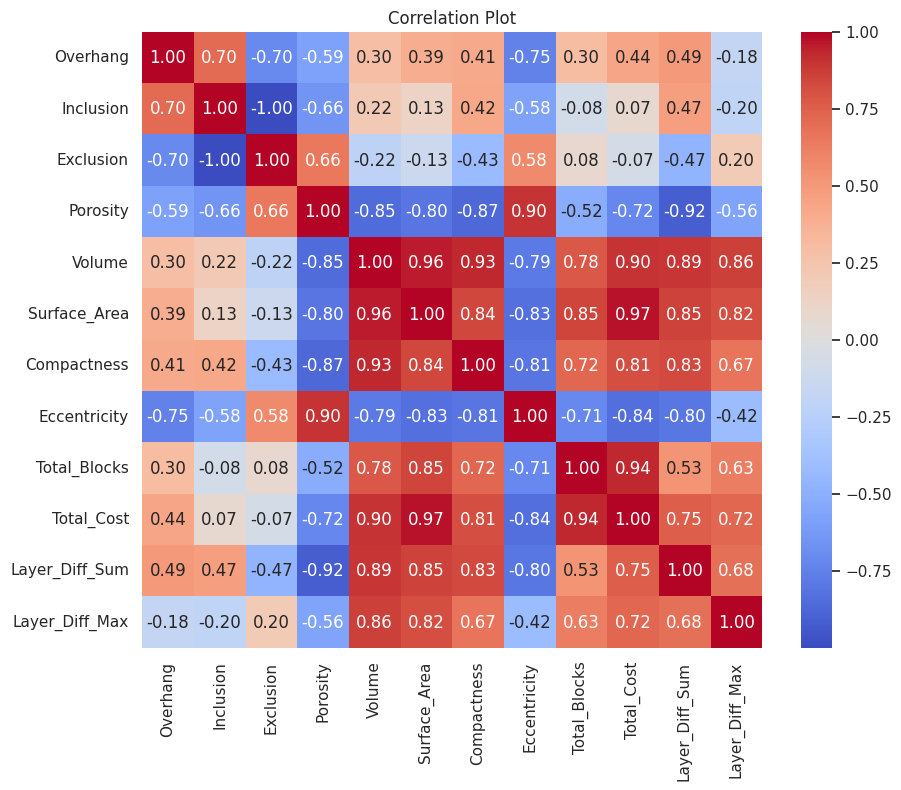

In [26]:
# Calculate the correlation matrix
corr = data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

**2.Feature importance model to predict total blocks**


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data.drop(['Total_Blocks', 'Total_Cost'], axis=1)
target_blocks = data['Total_Blocks']
target_cost = data['Total_Cost']

# Split the data into training and testing sets
X_train, X_test, y_train_blocks, y_test_blocks = train_test_split(features, target_blocks, test_size=0.2, random_state=42)
X_train, X_test, y_train_cost, y_test_cost = train_test_split(features, target_cost, test_size=0.2, random_state=42)

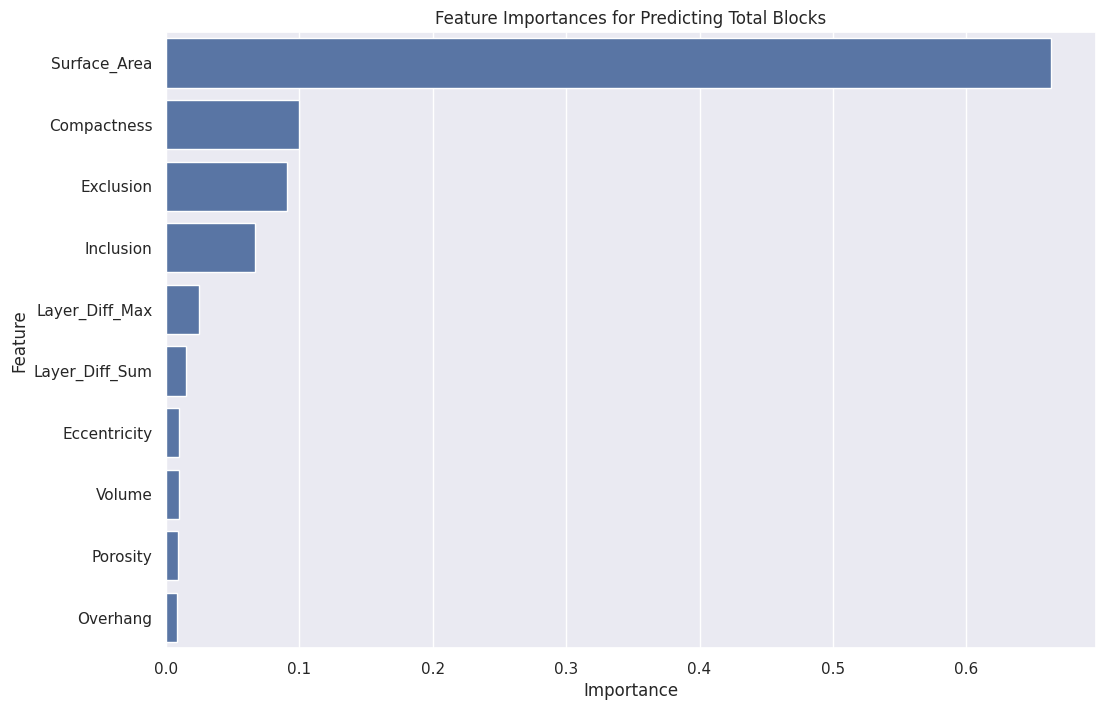

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Example with a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train_blocks)

# Get feature importances
importances = model.feature_importances_
feature_names = features.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting Total Blocks')
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variables
features = data.drop(['Total_Blocks', 'Total_Cost'], axis=1)
target_blocks = data['Total_Blocks']
target_cost = data['Total_Cost']

# Drop 'Total_Cost' from features
features_without_cost = features.drop(['Total_Cost'], axis=1, errors='ignore')

# Split the data again
X_train, X_test, y_train_blocks, y_test_blocks = train_test_split(features_without_cost, target_blocks, test_size=0.2, random_state=42)

# Initialize and train the model for predicting Total_Blocks
model_blocks_without_cost = RandomForestRegressor()
model_blocks_without_cost.fit(X_train, y_train_blocks)

# Evaluate the model
y_pred_blocks = model_blocks_without_cost.predict(X_test)
mse_blocks = mean_squared_error(y_test_blocks, y_pred_blocks)
rmse_blocks = mean_squared_error(y_test_blocks, y_pred_blocks, squared=False)
r2_blocks = r2_score(y_test_blocks, y_pred_blocks)

print(f'Blocks Prediction (without Total_Cost) - MSE: {mse_blocks}, RMSE: {rmse_blocks}, R2: {r2_blocks}')

Blocks Prediction (without Total_Cost) - MSE: 124.35956882085117, RMSE: 11.151662155071376, R2: 0.99674016163716


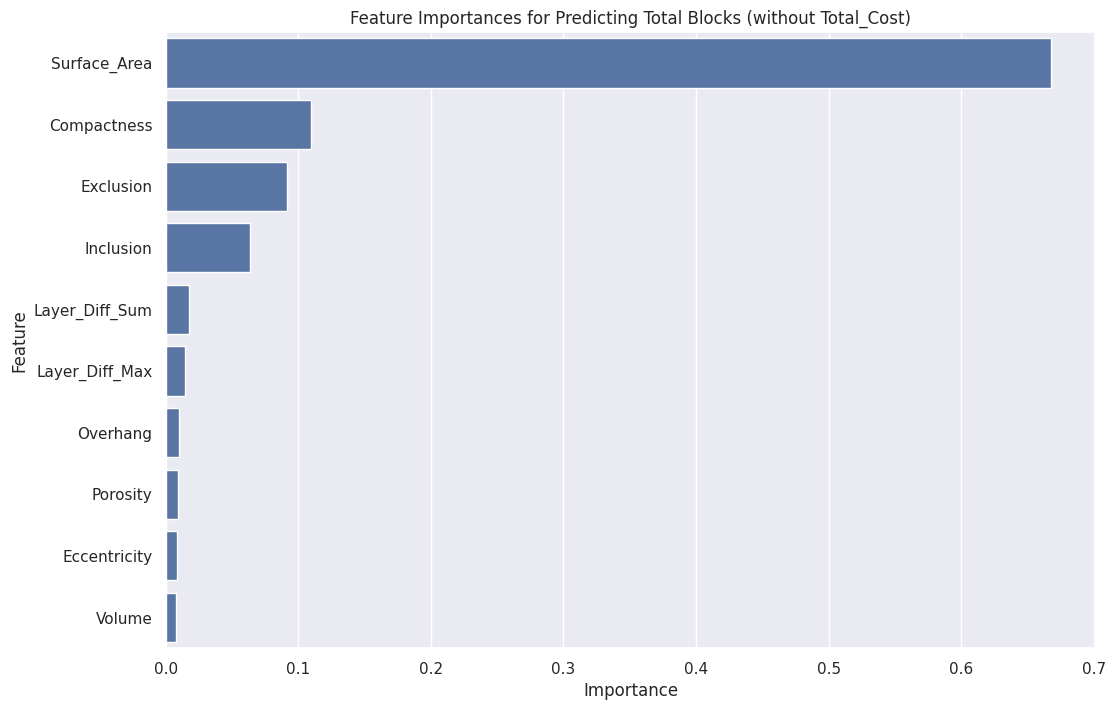

In [33]:
# Get feature importances again
importances_without_cost = model_blocks_without_cost.feature_importances_
feature_names_without_cost = features_without_cost.columns

# Create a DataFrame for better visualization
feature_importances_without_cost = pd.DataFrame({'Feature': feature_names_without_cost, 'Importance': importances_without_cost})

# Sort the features by importance
feature_importances_without_cost = feature_importances_without_cost.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_without_cost)
plt.title('Feature Importances for Predicting Total Blocks (without Total_Cost)')
plt.show()

**3. Learning Curves:**
Learning curves show the performance of your model on training and validation sets as a function of the number of training samples, which helps you understand if your model is overfitting or underfitting.


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


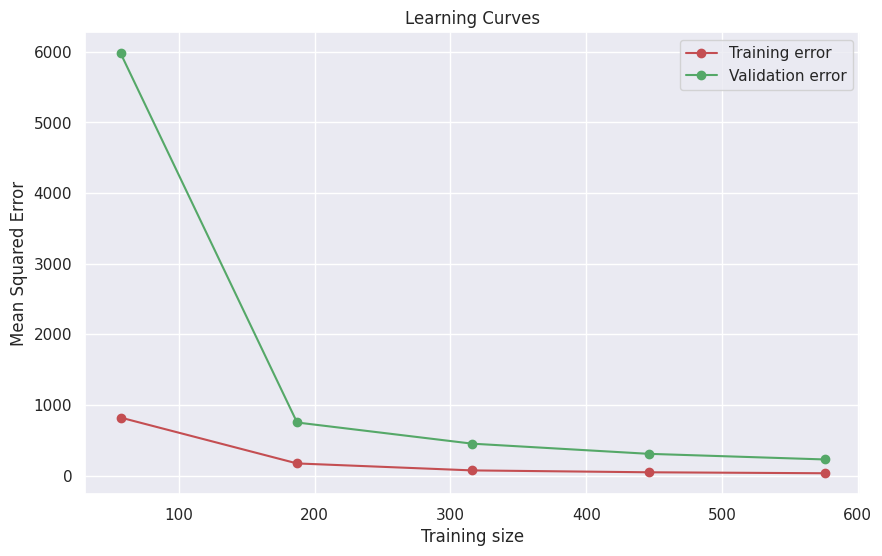

In [34]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_blocks_without_cost, X_train, y_train_blocks, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
plt.xlabel('Training size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

**4. Pair Plot** (Scatterplot Matrix)
A pair plot allows you to visualize the pairwise relationships between features and between features and the target variable. This can help identify correlations and potential outliers.



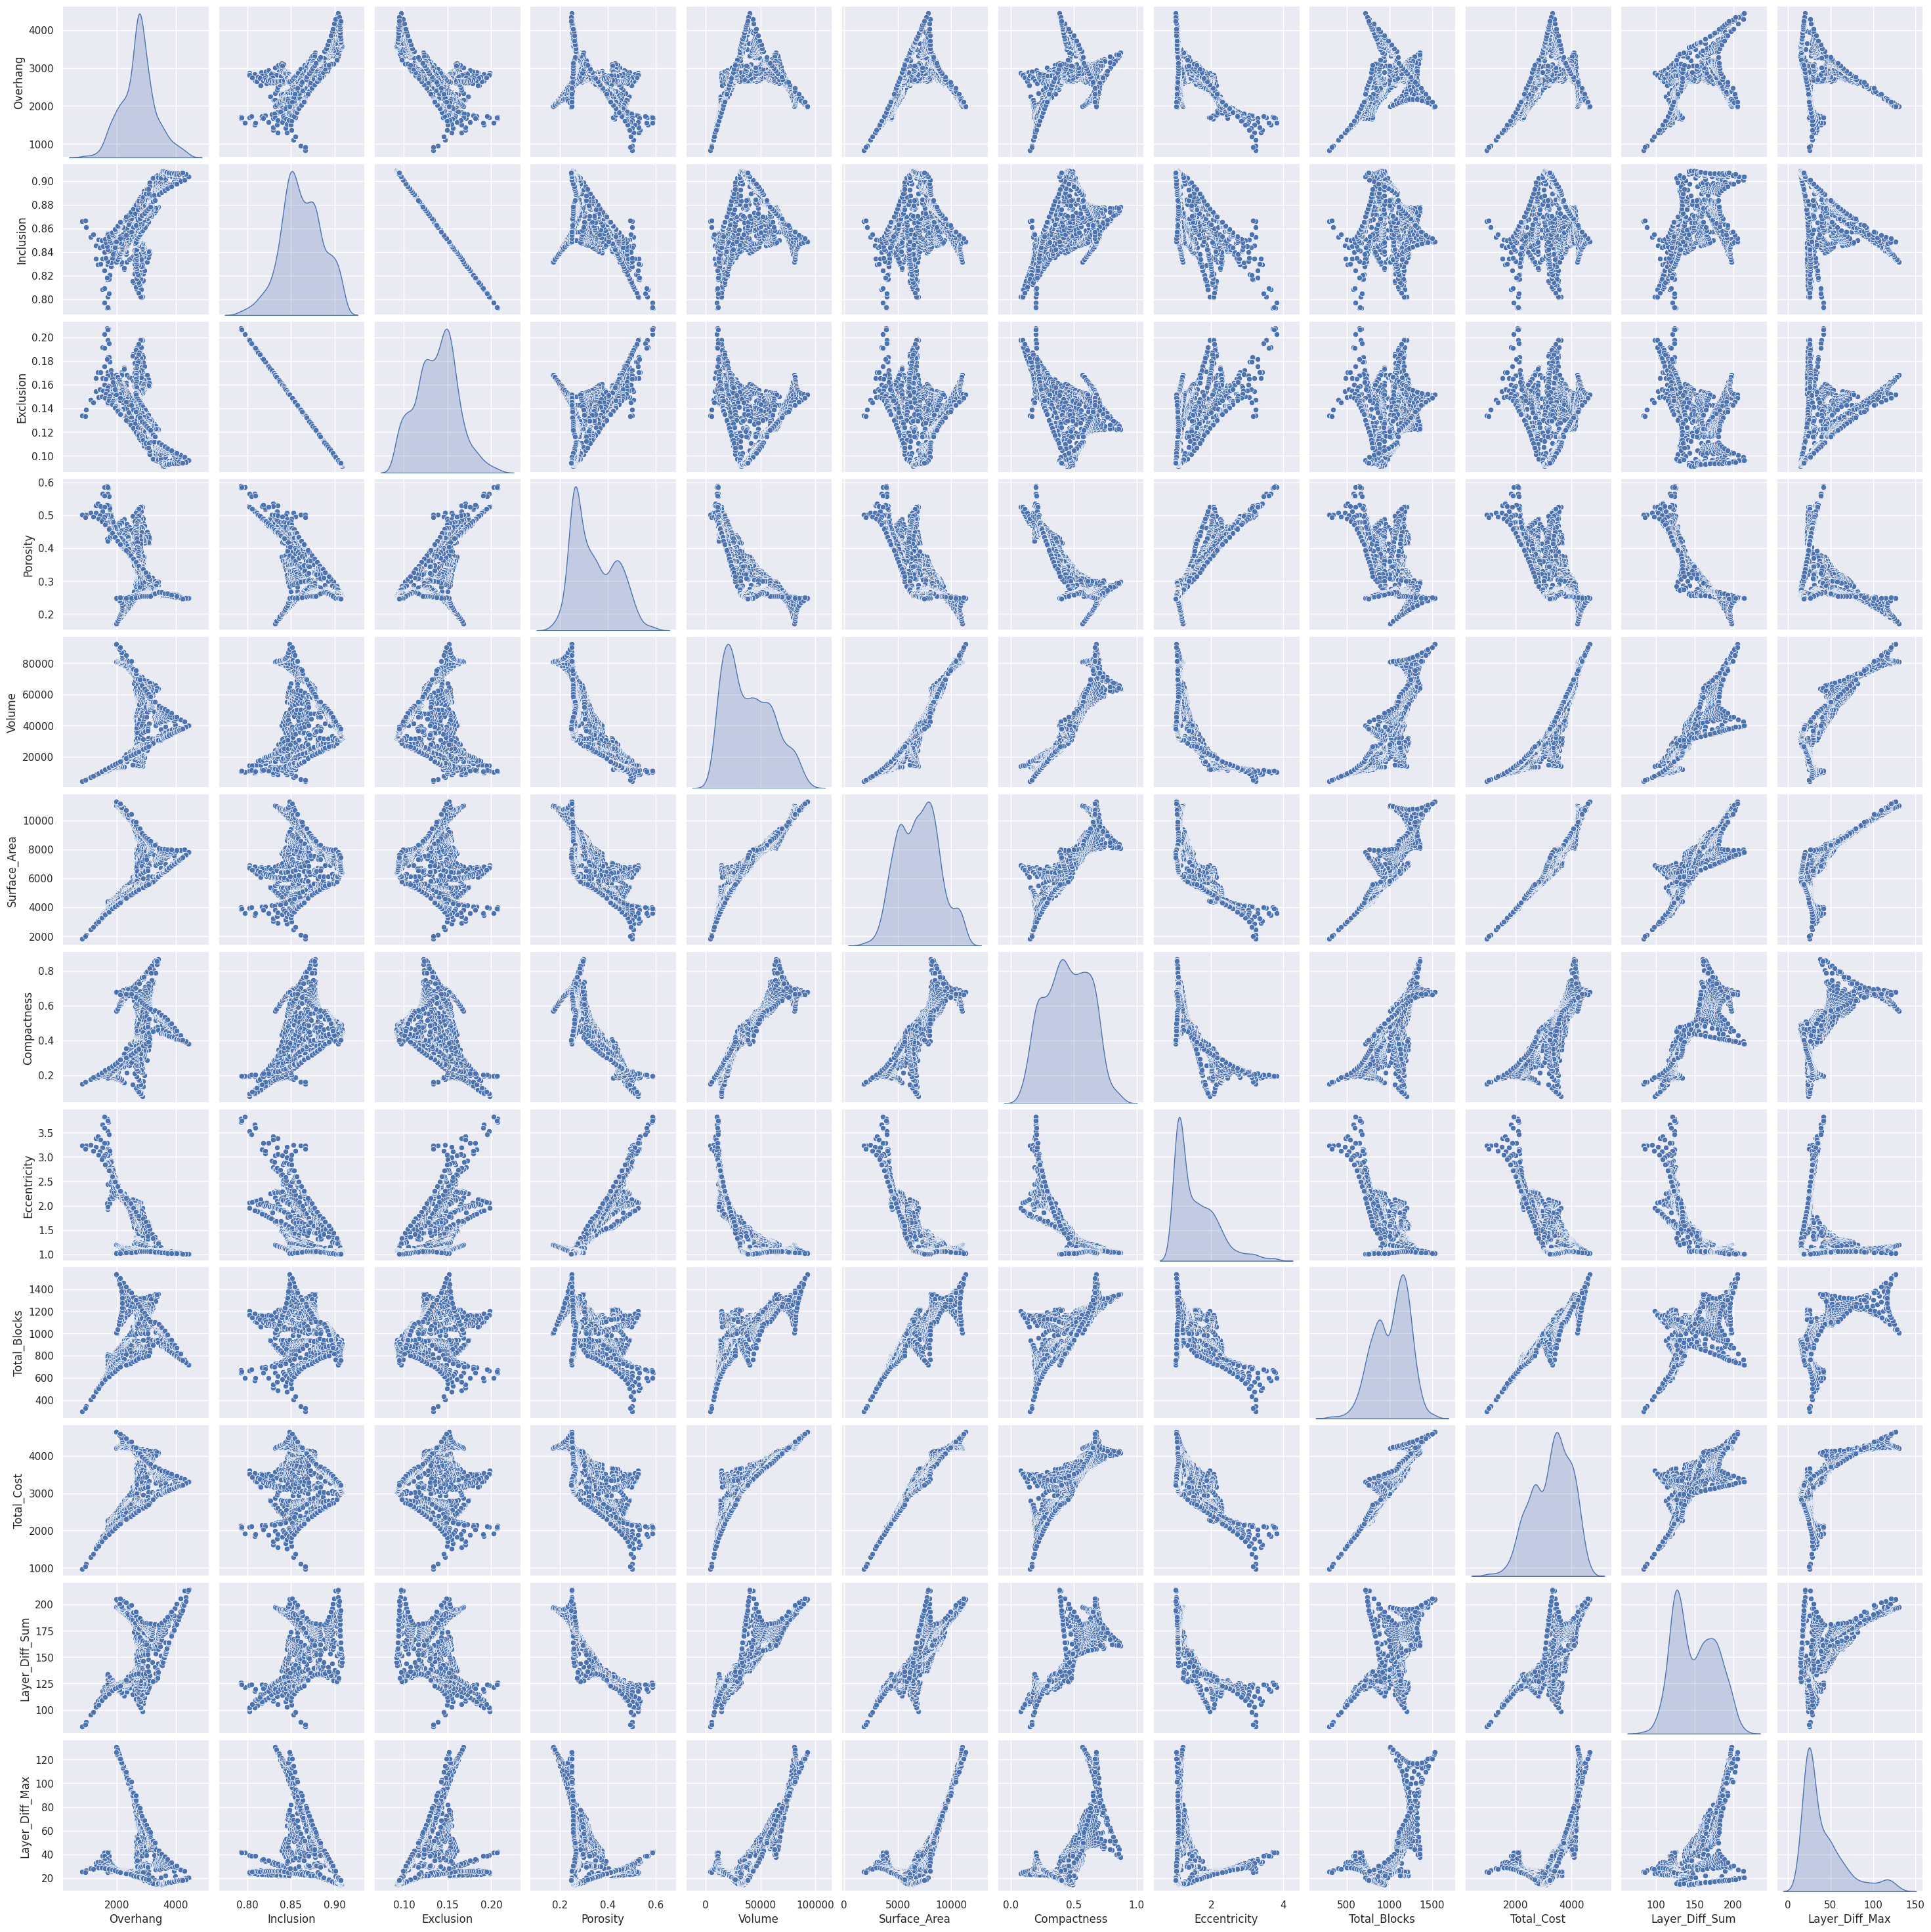

In [36]:
# Pair plot for all features including the target variable
sns.pairplot(data, diag_kind='kde')
plt.show()

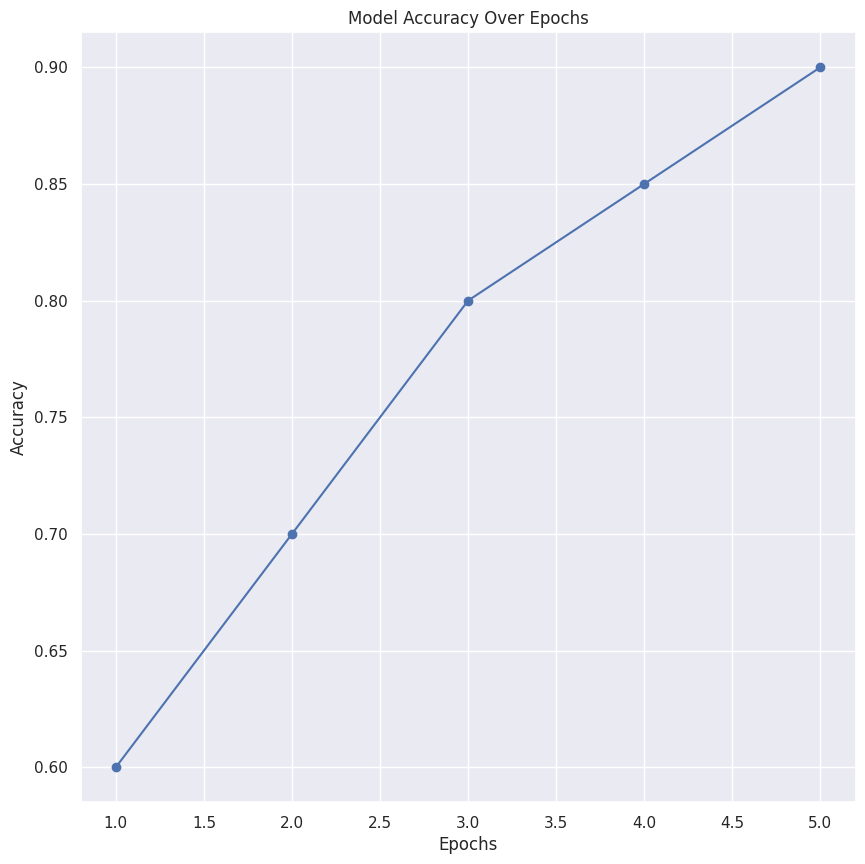

In [37]:
# Example accuracy data
epochs = [1, 2, 3, 4, 5]  # Epoch numbers
accuracies = [0.6, 0.7, 0.8, 0.85, 0.9]  # Accuracy values corresponding to each epoch

# Plotting the graph
plt.plot(epochs, accuracies, marker='o', linestyle='-')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [38]:
# Load and instantiate a StandardSclaer
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_lengths_scaled = scalerX.fit_transform(X_lengths)

In [39]:
# Define the dependant variable / target to predict
y_reg = data.Total_Cost


In [40]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_lengths_scaled, y_reg, data, test_size = 0.2, random_state = 42)

Train model

In [44]:
# Import and instantiate the baseline model
SKmodel = LinearRegression()

# Model training
SKmodel.fit(X_train, y_train)

# Make predictions
y_pred = SKmodel.predict(X_test)

# Model performance on the test-set / This score is R^2
print('R^2 Score:', SKmodel.score(X_test, y_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

R^2 Score: 1.0
Mean Squared Error: 3.423608646400031e-25


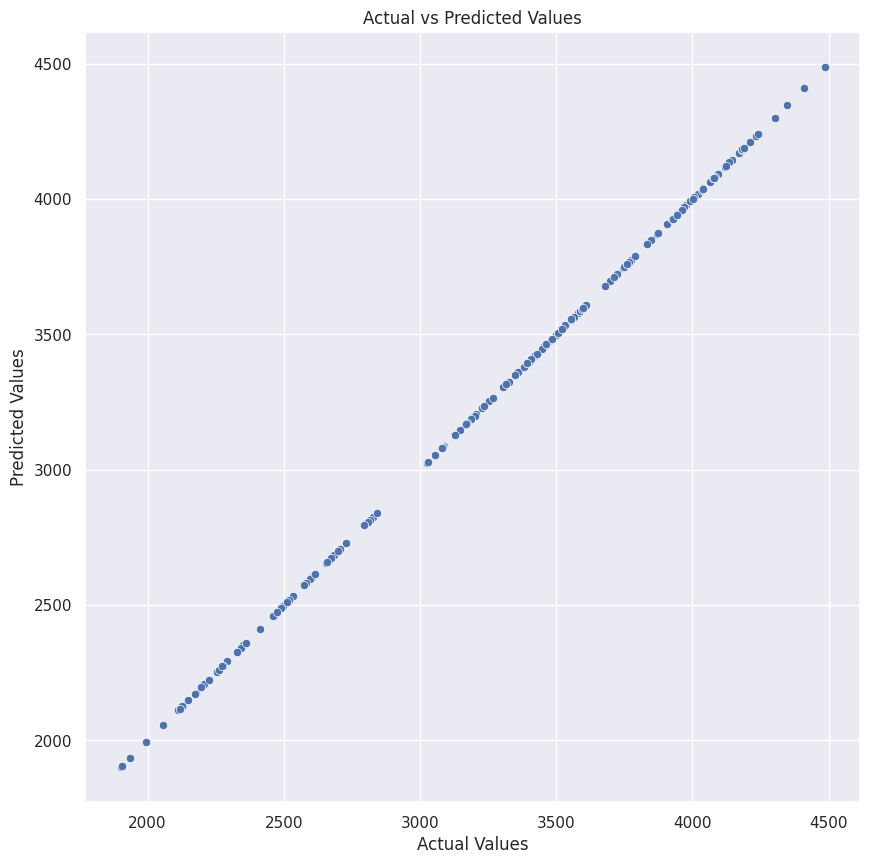

In [45]:

# Plotting the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Dropping least important Features

Cell 1: Define Reduced Features

In [53]:
# Define features and target variables for Total_Blocks prediction
features = data.drop(['Total_Blocks', 'Total_Cost'], axis=1)
target_blocks = data['Total_Blocks']

# Define reduced features by dropping the least important ones
reduced_features = features.drop(['Eccentricity', 'Volume', 'Porosity', 'Overhang'], axis=1)


Cell 2: Split the Data into Training and Testing Sets

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with reduced features for Total_Blocks
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(reduced_features, target_blocks, test_size=0.2, random_state=42)


Cell 3: Train the Model with Reduced Features

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Train the model with reduced features
model_reduced = RandomForestRegressor()
model_reduced.fit(X_train_reduced, y_train_reduced)


RandomForestRegressor()

Cell 4: Evaluate the New Model

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the new model
y_pred_reduced = model_reduced.predict(X_test_reduced)
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
r2_reduced = r2_score(y_test_reduced, y_pred_reduced)

print('Reduced Model - MSE:', mse_reduced)
print('Reduced Model - R²:', r2_reduced)


Reduced Model - MSE: 185.33701770358797
Reduced Model - R²: 0.9951417592864538


Cell 5: Train and Evaluate the Original Model (for Comparison)

In [57]:
# Assuming the original model has not been defined in this session
# Define the original features and target again
X_train, X_test, y_train_blocks, y_test_blocks = train_test_split(features, target_blocks, test_size=0.2, random_state=42)

# Train the original model
model = RandomForestRegressor()
model.fit(X_train, y_train_blocks)

# Evaluate the original model
y_pred_original = model.predict(X_test)
mse_original = mean_squared_error(y_test_blocks, y_pred_original)
r2_original = r2_score(y_test_blocks, y_pred_original)

print('Original Model - MSE:', mse_original)
print('Original Model - R²:', r2_original)


Original Model - MSE: 134.99399512619377
Original Model - R²: 0.9964614013361582


Cell 6: Plot the Predictions of the Reduced Model

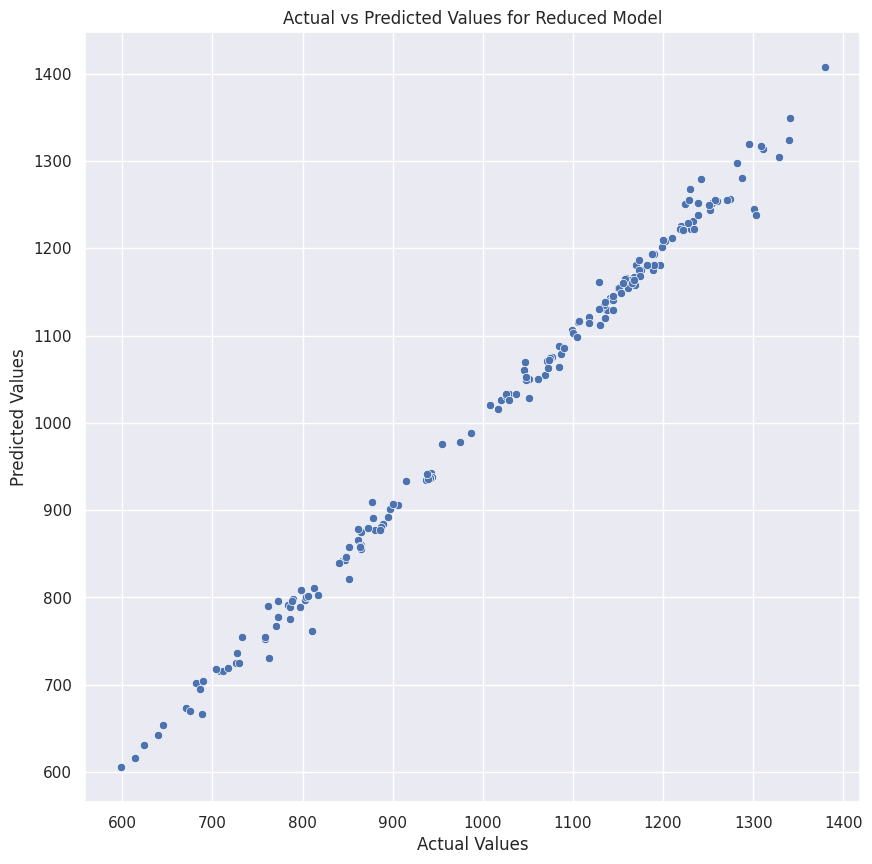

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the predictions of the reduced model
sns.scatterplot(x=y_test_reduced, y=y_pred_reduced)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Reduced Model')
plt.show()


Conclusion:

    Original Model: The original model, which uses all features, performs slightly better in terms of both MSE and R² score. This suggests that the least important features (Eccentricity, Volume, Porosity, Overhang) still provide some marginal value in improving the model's accuracy.

# Overfitting Check on Original Data

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target_blocks, test_size=0.2, random_state=42)

# Train the model on the training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the validation data
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Training MSE: {train_mse}, Training R²: {train_r2}')
print(f'Validation MSE: {val_mse}, Validation R²: {val_r2}')


Training MSE: 22.546688283584793, Training R²: 0.9994743152955539
Validation MSE: 115.74592690262672, Validation R²: 0.9969659511010109


In [60]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_mse = cross_val_score(model, features, target_blocks, cv=5, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(model, features, target_blocks, cv=5, scoring='r2')

print(f'Cross-validated MSE: {-cv_mse.mean()}')
print(f'Cross-validated R²: {cv_r2.mean()}')


Cross-validated MSE: 6478.359586631263
Cross-validated R²: 0.8319565594968218


# Overfitting Check on Reduced Features

In [61]:
# Define reduced features by dropping the least important ones
reduced_features = features.drop(['Eccentricity', 'Volume', 'Porosity', 'Overhang'], axis=1)

# Split the data into training and validation sets with reduced features
X_train_reduced, X_val_reduced, y_train_reduced, y_val_reduced = train_test_split(reduced_features, target_blocks, test_size=0.2, random_state=42)


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Train the model with reduced features
model_reduced = RandomForestRegressor()
model_reduced.fit(X_train_reduced, y_train_reduced)

# Evaluate the model on the training data
y_train_pred_reduced = model_reduced.predict(X_train_reduced)
train_mse_reduced = mean_squared_error(y_train_reduced, y_train_pred_reduced)
train_r2_reduced = r2_score(y_train_reduced, y_train_pred_reduced)

# Evaluate the model on the validation data
y_val_pred_reduced = model_reduced.predict(X_val_reduced)
val_mse_reduced = mean_squared_error(y_val_reduced, y_val_pred_reduced)
val_r2_reduced = r2_score(y_val_reduced, y_val_pred_reduced)

print(f'Reduced Model - Training MSE: {train_mse_reduced}, Training R²: {train_r2_reduced}')
print(f'Reduced Model - Validation MSE: {val_mse_reduced}, Validation R²: {val_r2_reduced}')


Reduced Model - Training MSE: 31.683984850496763, Training R²: 0.9992612757136518
Reduced Model - Validation MSE: 178.10113199565492, Validation R²: 0.995331433615848


In [63]:
# Perform 5-fold cross-validation
cv_mse_reduced = -cross_val_score(model_reduced, reduced_features, target_blocks, cv=5, scoring='neg_mean_squared_error')
cv_r2_reduced = cross_val_score(model_reduced, reduced_features, target_blocks, cv=5, scoring='r2')

print(f'Reduced Model - Cross-validated MSE: {cv_mse_reduced.mean()}')
print(f'Reduced Model - Cross-validated R²: {cv_r2_reduced.mean()}')


Reduced Model - Cross-validated MSE: 6941.967041797677
Reduced Model - Cross-validated R²: 0.8333067115123782


In [64]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_mse_reduced = -cross_val_score(model_reduced, reduced_features, target_blocks, cv=5, scoring='neg_mean_squared_error')
cv_r2_reduced = cross_val_score(model_reduced, reduced_features, target_blocks, cv=5, scoring='r2')

print(f'Reduced Model - Cross-validated MSE: {cv_mse_reduced.mean()}')
print(f'Reduced Model - Cross-validated R²: {cv_r2_reduced.mean()}')


Reduced Model - Cross-validated MSE: 7066.054359757623
Reduced Model - Cross-validated R²: 0.8357534964927152


# TENSORFLOW

In [68]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data.drop(['Total_Blocks', 'Total_Cost'], axis=1)
target_blocks = data['Total_Blocks']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_blocks, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate a sequential model
TFmodel = tf.keras.models.Sequential()

# Add dense layers
TFmodel.add(tf.keras.layers.Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
TFmodel.add(tf.keras.layers.Dense(32, activation='relu'))
TFmodel.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
TFmodel.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
TFmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Train the model
history = TFmodel.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, batch_size=16)


Epoch 1/200
36/36 [==============================] - 2s 13ms/step - loss: 425.6721 - val_loss: 404.7448
Epoch 2/200
36/36 [==============================] - 0s 10ms/step - loss: 424.6805 - val_loss: 396.5270
Epoch 3/200
36/36 [==============================] - 0s 12ms/step - loss: 422.3270 - val_loss: 388.7208
Epoch 4/200
36/36 [==============================] - 0s 9ms/step - loss: 410.0729 - val_loss: 370.4120
Epoch 5/200
36/36 [==============================] - 0s 7ms/step - loss: 405.0438 - val_loss: 383.9134
Epoch 6/200
36/36 [==============================] - 0s 7ms/step - loss: 391.1188 - val_loss: 357.6544
Epoch 7/200
36/36 [==============================] - 0s 5ms/step - loss: 377.5969 - val_loss: 366.4099
Epoch 8/200
36/36 [==============================] - 0s 6ms/step - loss: 382.0995 - val_loss: 350.3698
Epoch 9/200
36/36 [==============================] - 0s 6ms/step - loss: 377.5282 - val_loss: 352.6464
Epoch 10/200
36/36 [==============================] - 0s 9ms/step - lo

In [78]:
# Evaluate the model on the test data
loss = TFmodel.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = TFmodel.predict(X_test_scaled)


6/6 [==============================] - 0s 3ms/step - loss: 43.3975
Test Loss: 43.397544860839844
6/6 [==============================] - 0s 3ms/step


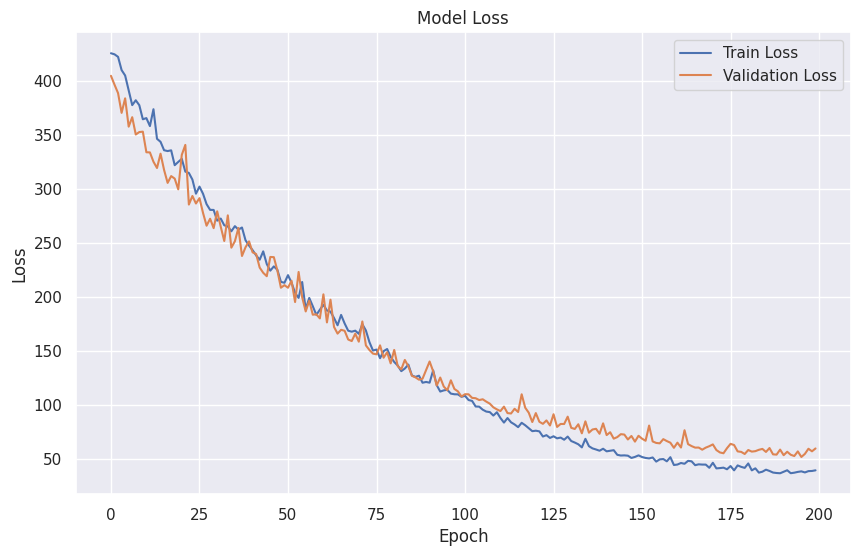

In [79]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [80]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for TensorFlow model
mse_tf = mean_squared_error(y_test, y_pred)
r2_tf = r2_score(y_test, y_pred)

print(f'TensorFlow Model - MSE: {mse_tf}, R²: {r2_tf}')


TensorFlow Model - MSE: 43.3976649174737, R²: 0.9988624166656652


# PCA

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the original combined dataset
#data = pd.read_csv('/path/to/original_data.csv')

# Define features and target variables
features = data.drop(['Total_Blocks', 'Total_Cost'], axis=1)
target_blocks = data['Total_Blocks']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_blocks, test_size=0.2, random_state=42)


In [82]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [94]:
# Apply PCA
pca = PCA(n_components=2)  # We are only interested in the first two principal components for this plot
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Explained variance ratio of each component: [0.65377989 0.26089704 0.05469353]


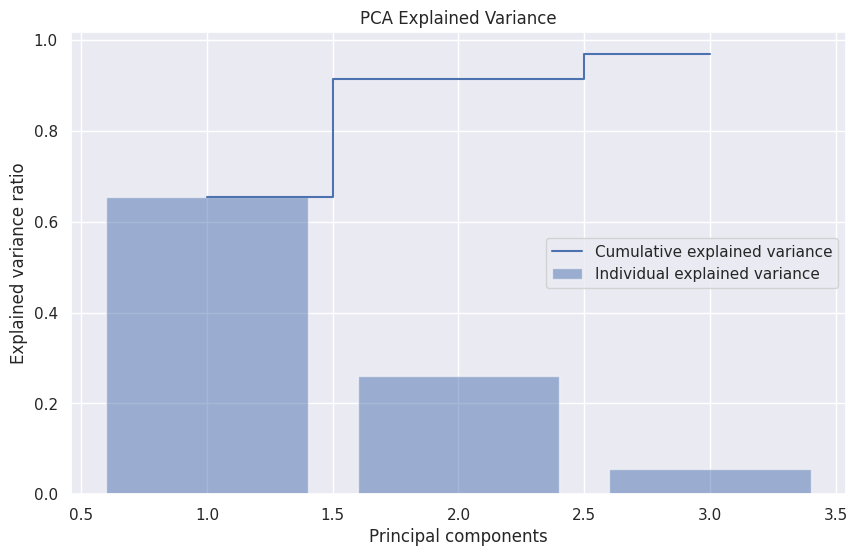

In [90]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio of each component: {explained_variance}')

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()


In [91]:
# Train Random Forest Model on PCA components
model_rf_pca = RandomForestRegressor()
model_rf_pca.fit(X_train_pca, y_train)

# Evaluate the Random Forest Model
y_pred_rf_pca = model_rf_pca.predict(X_test_pca)
mse_rf_pca = mean_squared_error(y_test, y_pred_rf_pca)
r2_rf_pca = r2_score(y_test, y_pred_rf_pca)

print(f'Random Forest Model (PCA) - MSE: {mse_rf_pca}, R²: {r2_rf_pca}')


Random Forest Model (PCA) - MSE: 384.1299673874443, R²: 0.9899307981212933


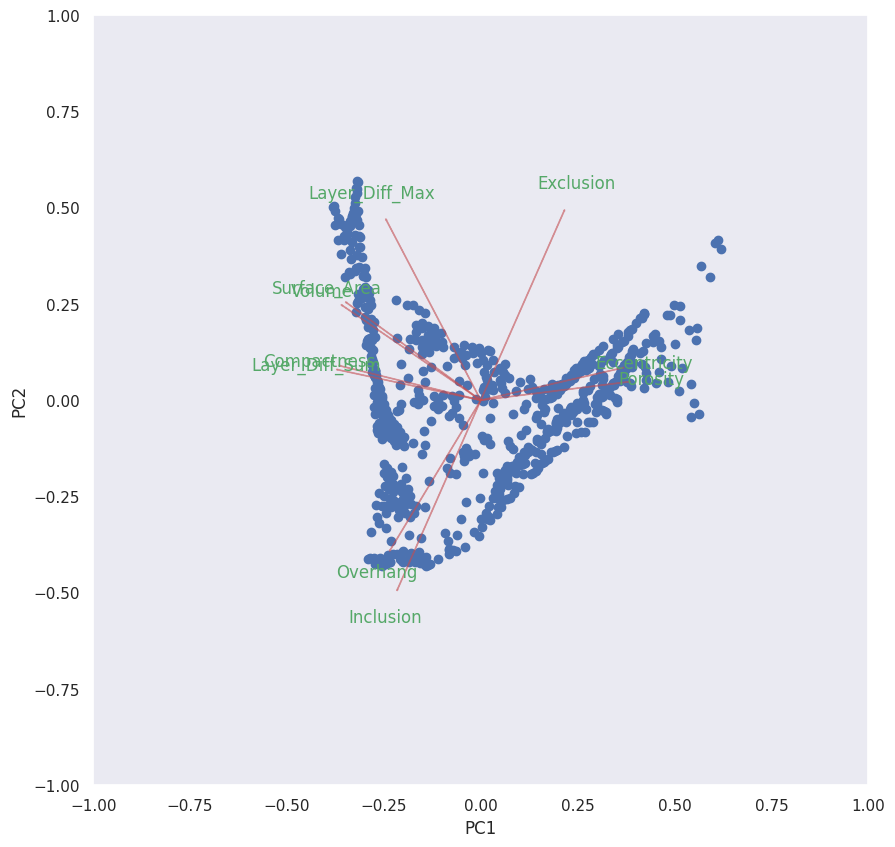

In [96]:
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, features.columns[i], color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the function with the first two principal components
myplot(X_train_pca[:, 0:2], np.transpose(pca.components_[0:2, :]))
plt.show()


# KMeans Clustering

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train_pca is your PCA-transformed data


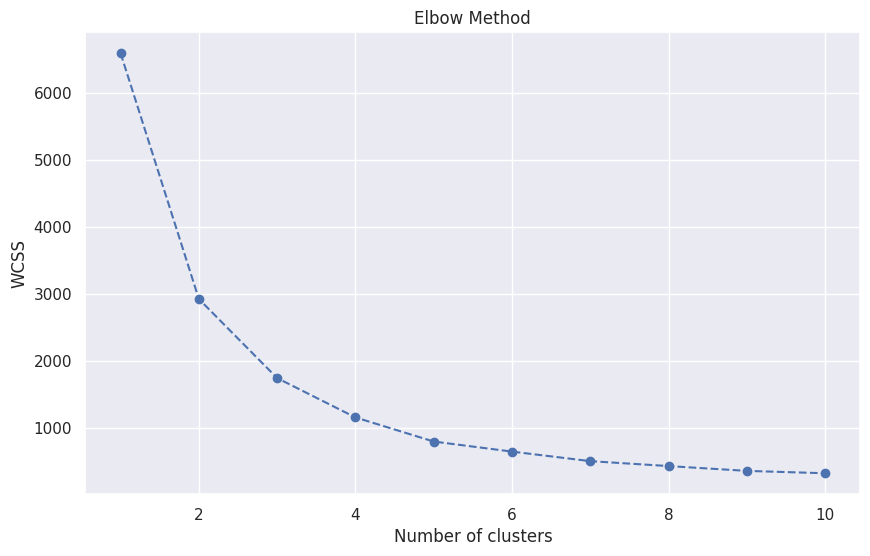

In [98]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [107]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_train_pca)

# Add the cluster labels to the PCA data
X_train_pca_clustered = np.column_stack((X_train_pca, y_kmeans))


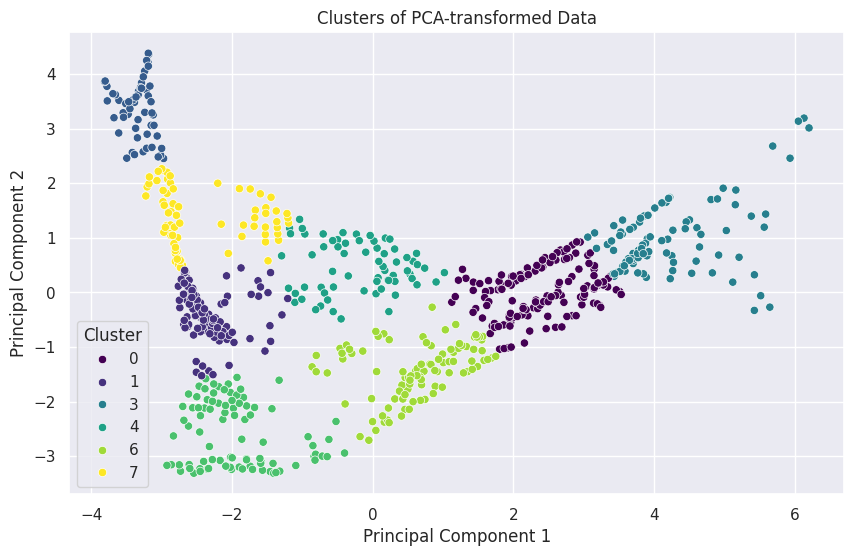

In [108]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_kmeans, palette='viridis')
plt.title('Clusters of PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
